<a href="https://colab.research.google.com/github/Pavle-Ilic/CCFraudDetector/blob/main/Stock_Trading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gym-anytrading
import gym
import gym_anytrading
from gym_anytrading.envs import TradingEnv, ForexEnv, StocksEnv, Actions, Positions
from gym_anytrading.datasets import STOCKS_GOOGL
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.0/172.0 kB 4.0 MB/s eta 0:00:00


In [2]:
df = pd.read_csv('Google_Stocks.csv')
df.head()

,Date,Open,High,Low,Close,Volume
0,05/26/2023,123.17,125.26,122.45,124.61,"35,635,941"
1,05/25/2023,124.52,125.32,121.96,123.48,"42,316,992"
2,05/24/2023,121.12,121.91,119.86,120.90,"34,182,641"
3,05/23/2023,124.16,124.63,122.21,122.56,"34,046,246"
4,05/22/2023,122.94,126.43,122.74,125.05,"35,253,031"


In [3]:
df.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume     object
dtype: object

In [4]:
df['Date'] = pd.to_datetime(df ['Date'])
df.set_index('Date', inplace=True)
df.dtypes

Open      float64
High      float64
Low       float64
Close     float64
Volume     object
dtype: object

In [5]:
df.sort_values('Date', ascending = True, inplace = True)
df['Volume'] = df['Volume'].apply(lambda x: float(x.replace(",", "")))
df.dtypes

Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object

In [6]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2022-05-26,105.68,108.65,105.22,107.79,37947219.0
2022-05-27,109.48,112.32,109.14,112.32,37914119.0
2022-05-31,112.75,115.74,112.08,113.76,50012259.0
2022-06-01,114.86,117.10,113.25,113.89,36605519.0
2022-06-02,114.00,117.90,112.95,117.62,37992279.0


In [7]:
print(df)

              Open    High     Low   Close      Volume
Date                                                  
2022-05-26  105.68  108.65  105.22  107.79  37947219.0
2022-05-27  109.48  112.32  109.14  112.32  37914119.0
2022-05-31  112.75  115.74  112.08  113.76  50012259.0
2022-06-01  114.86  117.10  113.25  113.89  36605519.0
2022-06-02  114.00  117.90  112.95  117.62  37992279.0
...            ...     ...     ...     ...         ...
2023-05-22  122.94  126.43  122.74  125.05  35253031.0
2023-05-23  124.16  124.63  122.21  122.56  34046246.0
2023-05-24  121.12  121.91  119.86  120.90  34182641.0
2023-05-25  124.52  125.32  121.96  123.48  42316992.0
2023-05-26  123.17  125.26  122.45  124.61  35635941.0

[252 rows x 5 columns]


In [8]:
env = gym.make('stocks-v0', df = df, frame_bound = (10, 190), window_size = 10)  

/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:31: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (10, 2)
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:190: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `return_info` to return information from the environment resetting.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:195: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/core.py:49: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibil

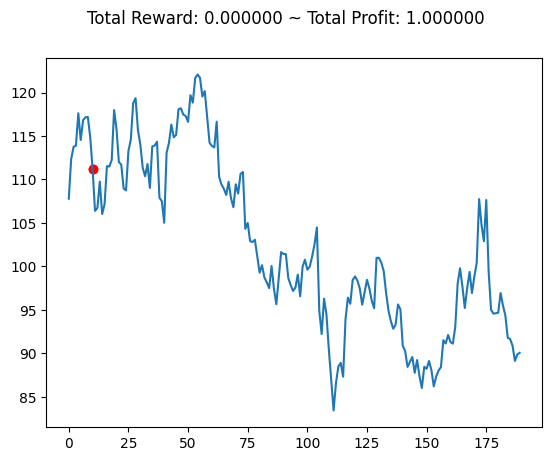

In [9]:
env.reset()
env.render()

# Random Trading

/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:227: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(


info: {'total_reward': -23.04000000000005, 'total_profit': 0.3931504872310054, 'position': 0}


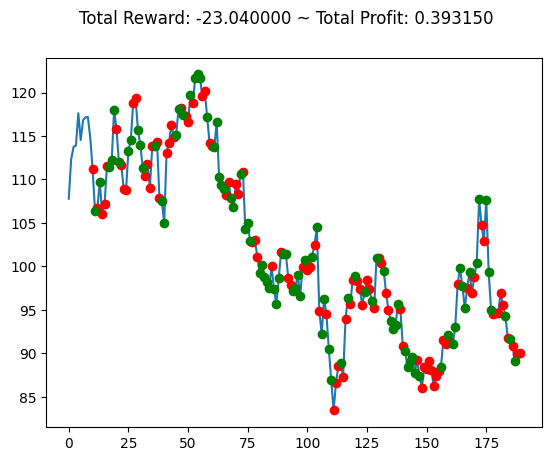

In [10]:
obs = env.reset()
while True:
  action = env.action_space.sample()
  observation, reward, done, info = env.step(action)
  if done:
    print(f"info: {info}")
    break
plt.cla()
env.render_all()
plt.show()

In [11]:
print("max_possible_profit:", env.max_possible_profit())

max_possible_profit: 4.927179064878625


# Building Deep Q Network

In [12]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from gym.wrappers import TimeLimit
import random
from collections import deque

In [13]:
env.action_space

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Discrete(2)

In [14]:
obs_space = env.observation_space.shape[0]
act_space = env.action_space.n
print(obs_space, act_space)

10 2


In [15]:
print(env.signal_features)

[[ 1.0779e+02  0.0000e+00]
 [ 1.1232e+02  4.5300e+00]
 [ 1.1376e+02  1.4400e+00]
 [ 1.1389e+02  1.3000e-01]
 [ 1.1762e+02  3.7300e+00]
 [ 1.1454e+02 -3.0800e+00]
 [ 1.1682e+02  2.2800e+00]
 [ 1.1715e+02  3.3000e-01]
 [ 1.1719e+02  4.0000e-02]
 [ 1.1484e+02 -2.3500e+00]
 [ 1.1116e+02 -3.6800e+00]
 [ 1.0639e+02 -4.7700e+00]
 [ 1.0672e+02  3.3000e-01]
 [ 1.0976e+02  3.0400e+00]
 [ 1.0603e+02 -3.7300e+00]
 [ 1.0714e+02  1.1100e+00]
 [ 1.1154e+02  4.4000e+00]
 [ 1.1149e+02 -5.0000e-02]
 [ 1.1224e+02  7.5000e-01]
 [ 1.1798e+02  5.7400e+00]
 [ 1.1583e+02 -2.1500e+00]
 [ 1.1201e+02 -3.8200e+00]
 [ 1.1170e+02 -3.1000e-01]
 [ 1.0896e+02 -2.7400e+00]
 [ 1.0874e+02 -2.2000e-01]
 [ 1.1326e+02  4.5200e+00]
 [ 1.1457e+02  1.3100e+00]
 [ 1.1878e+02  4.2100e+00]
 [ 1.1935e+02  5.7000e-01]
 [ 1.1568e+02 -3.6700e+00]
 [ 1.1402e+02 -1.6600e+00]
 [ 1.1135e+02 -2.6700e+00]
 [ 1.1037e+02 -9.8000e-01]
 [ 1.1178e+02  1.4100e+00]
 [ 1.0903e+02 -2.7500e+00]
 [ 1.1381e+02  4.7800e+00]
 [ 1.1390e+02  9.0000e-02]
 

In [16]:
!pip install git+https://github.com/DLR-RM/stable-baselines3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/DLR-RM/stable-baselines3 to /tmp/pip-req-build-r7dtta_u
  Running command git clone --filter=blob:none --quiet https://github.com/DLR-RM/stable-baselines3 /tmp/pip-req-build-r7dtta_u
  Resolved https://github.com/DLR-RM/stable-baselines3 to commit 8416f03c14977cbe6d09037a97936c4fa8f13a57
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 925.5/925.5 kB 21.9 MB/s eta 0:00:00
  Created wheel for stable-baselines3: filename=stable_baselines3-2.0.0a11-py3-none-any.whl size=177970 sha256=32d1b18cb73bf7384a08360c66824ea22caf9a1bdb16400a3533401905effd68
  Stored in directory: /tmp/pip-ephem-wheel-cache-mg21w488/wheels/3b/24/65/bc2794face336930a72bdbe36faf5aad6e2352b3d1dec310ca
Successfully built stable-baselines3


In [17]:
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import DQN
from stable_baselines3 import A2C
from stable_baselines3 import PPO
!pip install shimmy>=0.2.1

/usr/local/lib/python3.10/dist-packages/torch/utils/tensorboard/__init__.py:4: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if not hasattr(tensorboard, "__version__") or LooseVersion(


In [ ]:
env_maker = lambda: gym.make('stocks-v0', df = df, frame_bound = (10, 190), window_size = 10)  
env = DummyVecEnv([env_maker])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:31: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (10, 2)
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/lo

# DQN


In [26]:
model = DQN("MlpPolicy", env, verbose=1)

Using cpu device


In [27]:
model.learn(total_timesteps=1000000)

Streaming output truncated to the last 5000 lines.
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.746    |
|    n_updates        | 43283    |
----------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 59       |
|    ep_rew_mean     | 13.8     |
| time/              |          |
|    episodes        | 15520    |
|    fps             | 3351     |
|    time_elapsed    | 273      |
|    total_timesteps | 915680   |
---------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 59       |
|    ep_rew_mean      | 13.6     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 15524    |
|    fps              | 3351     |
|    time_elapsed     | 273      |
|    total_timesteps  | 915975   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss     

In [28]:
model.save("DQN_Trading")

In [29]:
del model

# A2C

In [30]:
model2 = A2C("MlpPolicy", env, verbose=1)
model2.learn(total_timesteps=1000000)

Streaming output truncated to the last 5000 lines.
|    value_loss         | 9.86     |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 59       |
|    ep_rew_mean        | 15.3     |
| time/                 |          |
|    fps                | 2603     |
|    iterations         | 10700    |
|    time_elapsed       | 102      |
|    total_timesteps    | 267500   |
| train/                |          |
|    entropy_loss       | -0.6     |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 10699    |
|    policy_loss        | 0.0646   |
|    value_loss         | 4.81     |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 59       |
|    ep_rew_mean        | 18       |
| time/                 |          |
|    fps                | 2604     |
|    iterations         

In [31]:
model2.save("A2C_Trading")
del model2

# Comparison

In [32]:
env = gym.make('stocks-v0', df = df, frame_bound = (190, 250), window_size = 10)  
obs = env.reset()
model = DQN.load("DQN_Trading")
while True:
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': 17.92, 'total_profit': 0.9128521970045753, 'position': 1}


DQN Result

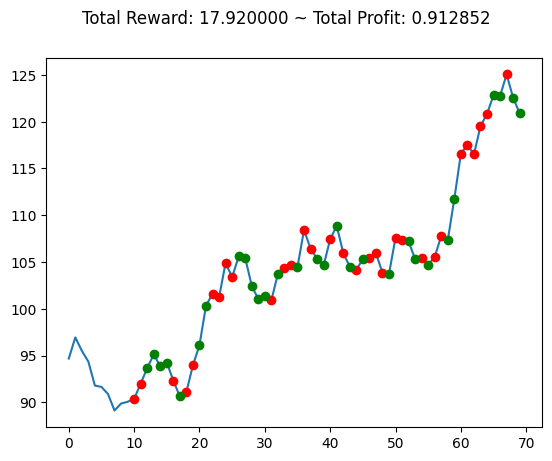

In [33]:
plt.cla()
env.render_all()
plt.show()


In [34]:
obs = env.reset()
model2 = A2C.load("A2C_Trading")
while True:
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)

    if done:
        print("info", info)
        break

info {'total_reward': 19.230000000000004, 'total_profit': 0.919216250431364, 'position': 1}


A2C Results

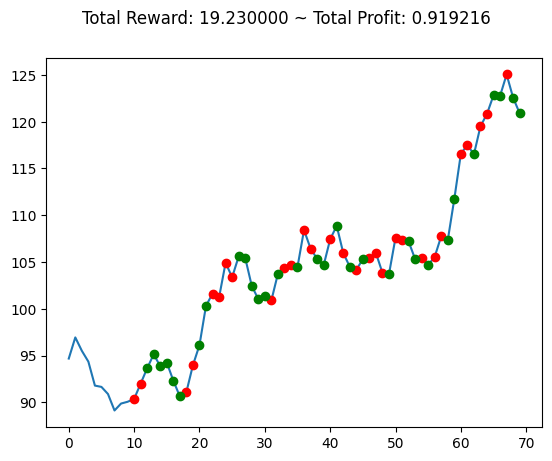

In [35]:
plt.cla()
env.render_all()
plt.show()